In [1]:
# Importación de librerias a utilizar
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap.umap_ import UMAP
from pandasql import sqldf
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import pandas as pd, sklearn as sl, numpy as np, matplotlib.pyplot as plt, seaborn as sns


%matplotlib inline

In [2]:
# CARGA Y DEPURACIÓN DE DATOS (Punto 1.a)
# Este comentario se adjunta al final del ejercicio: Se encontraron espacios en el genero, se encontraron comillas que impedian cargar 
# adecuadamente e incluso se encontraron celdas en blanco (en el año). Para solventar esto, a continuación se detallarán algunos ejercicios para
# reemplazar reemplazar espacios, reemplazos de caracteres y los espacios en blanco no se tendrán en cuenta. 

#Se carga el archivo como esta en una columna para detectar posibles falencias en los datos. Para esto cambié el separador de , por ;

CargaTemporal = pd.read_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Data_Taller_1.csv",delimiter=';')

In [3]:
# se deja solamente la columna que tiene datos y se elimina la columna en blanco que tenia el archivo

CargaTemporal = CargaTemporal[['artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre']]
CargaTemporal

,"artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre"
0,"Britney Spears,Oops!...I Did It Again,211160,F..."
1,"blink-182,All The Small Things,167066,False,19..."
2,"Faith Hill,Breathe,250546,False,1999,66,0.529,..."
3,"Bon Jovi,It's My Life,224493,False,2000,78,0.5..."
4,"*NSYNC,Bye Bye Bye,200560,False,2000,,0.614,0...."
...,...
1995,"Jonas Brothers,Sucker,181026,False,2019,79,0.8..."
1996,"Taylor Swift,Cruel Summer,178426,False,2019,78..."
1997,"Blanco Brown,The Git Up,200593,False,2019,69,0..."
1998,"Sam Smith,Dancing With A Stranger (with Norman..."


In [4]:
# Reemplazo las comillas dobles por comas. Esto me generará columnas en blanco que despues limpiaré

def RemoverComillas(x):
    x2 = x.replace('"',',')             
    return x2

CargaTemporal.iloc[1].apply(RemoverComillas)

artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre    blink-182,All The Small Things,167066,False,19...
Name: 1, dtype: object

In [5]:
CargaTemporal

,"artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre"
0,"Britney Spears,Oops!...I Did It Again,211160,F..."
1,"blink-182,All The Small Things,167066,False,19..."
2,"Faith Hill,Breathe,250546,False,1999,66,0.529,..."
3,"Bon Jovi,It's My Life,224493,False,2000,78,0.5..."
4,"*NSYNC,Bye Bye Bye,200560,False,2000,,0.614,0...."
...,...
1995,"Jonas Brothers,Sucker,181026,False,2019,79,0.8..."
1996,"Taylor Swift,Cruel Summer,178426,False,2019,78..."
1997,"Blanco Brown,The Git Up,200593,False,2019,69,0..."
1998,"Sam Smith,Dancing With A Stranger (with Norman..."


In [6]:
#Se exporta a un nuevo CSV, con diferente nombre para mantener el archivo original

CargaTemporal.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Data_Taller_1_Depurado.csv",quotechar=',')

In [7]:
CargaArchivoSinComillas = pd.read_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Data_Taller_1_Depurado.csv",on_bad_lines='skip')
CargaArchivoSinComillas

,Unnamed: 0,Unnamed: 1,artist,Unnamed: 3,song,Unnamed: 5,duration_ms,Unnamed: 7,explicit,Unnamed: 9,...,instrumentalness,Unnamed: 29,liveness,Unnamed: 31,valence,Unnamed: 33,tempo,Unnamed: 35,genre,Unnamed: 37
0,0,NaN,Britney Spears,NaN,Oops!...I Did It Again,NaN,211160.0,NaN,False,NaN,...,0.000018,NaN,0.3550,NaN,0.894,NaN,95.053,NaN,pop,NaN
1,1,NaN,blink-182,NaN,All The Small Things,NaN,167066.0,NaN,False,NaN,...,0.000000,NaN,0.6120,NaN,0.684,NaN,148.726,NaN,"rock,, pop",NaN
2,2,NaN,Faith Hill,NaN,Breathe,NaN,250546.0,NaN,False,NaN,...,0.000000,NaN,0.2510,NaN,0.278,NaN,136.859,NaN,"pop,, country",NaN
3,3,NaN,Bon Jovi,NaN,It's My Life,NaN,224493.0,NaN,False,NaN,...,0.000013,NaN,0.3470,NaN,0.544,NaN,119.992,NaN,"rock,, metal",NaN
4,4,NaN,*NSYNC,NaN,Bye Bye Bye,NaN,200560.0,NaN,False,NaN,...,0.001040,NaN,0.0845,NaN,0.879,NaN,172.656,NaN,pop,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,1995,NaN,Jonas Brothers,NaN,Sucker,NaN,181026.0,NaN,False,NaN,...,0.000000,NaN,0.1060,NaN,0.952,NaN,137.958,NaN,pop,NaN
1995,1996,NaN,Taylor Swift,NaN,Cruel Summer,NaN,178426.0,NaN,False,NaN,...,0.000021,NaN,0.1050,NaN,0.564,NaN,169.994,NaN,pop,NaN
1996,1997,NaN,Blanco Brown,NaN,The Git Up,NaN,200593.0,NaN,False,NaN,...,0.000000,NaN,0.2740,NaN,0.811,NaN,NaN,NaN,"hip hop,, country",NaN
1997,1998,NaN,Sam Smith,NaN,Dancing With A Stranger (with Normani),NaN,171029.0,NaN,False,NaN,...,0.000002,NaN,0.2220,NaN,0.347,NaN,102.998,NaN,pop,NaN


In [8]:
# Creamos un dataframe definitivo con las columnas que tienen datos. 

CancionesxArtistas = CargaArchivoSinComillas[['artist','song','duration_ms','explicit','year','popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','genre']]

In [9]:
# Exploramos el tipo de datos que tienen las diferentes columnas

CancionesxArtistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            1999 non-null   object 
 1   song              1999 non-null   object 
 2   duration_ms       1996 non-null   float64
 3   explicit          1997 non-null   object 
 4   year              1998 non-null   float64
 5   popularity        1995 non-null   float64
 6   danceability      1995 non-null   float64
 7   energy            1998 non-null   float64
 8   key               1998 non-null   float64
 9   loudness          1997 non-null   float64
 10  mode              1998 non-null   float64
 11  speechiness       1997 non-null   float64
 12  acousticness      1995 non-null   float64
 13  instrumentalness  1997 non-null   float64
 14  liveness          1998 non-null   float64
 15  valence           1997 non-null   float64
 16  tempo             1996 non-null   float64


In [10]:
# PUNTO 1.b: ¿Cuál es el top 10 de artistas más activos de los últimos 10 años?

# Para esto vamos a hacer un conteo de canciones por artista que hayan salido entre el año 2010 y 2020. Empezamos por realizar un dataFrame con únicamente el artista y el año de la canción.

ArtistaxAñodeCancion = CancionesxArtistas[['artist','year']]

In [11]:
ArtistaxAñodeCancion.index

RangeIndex(start=0, stop=1999, step=1)

In [12]:
# Incluyo una columna que me indique si este registro pertenece a la decada 2010 a 2020.

ArtistaxAñodeCancion['ultima decada'] = ArtistaxAñodeCancion['year'].between(2010.0,2020.0)

In [13]:
ArtistaxAñodeCancion

,artist,year,ultima decada
0,Britney Spears,2000.0,False
1,blink-182,1999.0,False
2,Faith Hill,1999.0,False
3,Bon Jovi,2000.0,False
4,*NSYNC,2000.0,False
...,...,...,...
1994,Jonas Brothers,2019.0,True
1995,Taylor Swift,2019.0,True
1996,Blanco Brown,2019.0,True
1997,Sam Smith,2019.0,True


In [14]:
#Creo un dataframe en donde filtro solamente los registros que pertenecen a la última decada

ultimaDecada = ArtistaxAñodeCancion[(ArtistaxAñodeCancion['ultima decada'] == True)]

In [15]:
# Se hace hace una agrupación por artista y la columna ultima decada haciendo un conteo de apariciones.

RespuestaPunto1b = ultimaDecada.groupby(['artist','ultima decada']).size().reset_index(name="Numero_canciones")

In [16]:
# Se organiza el dataFrame y se imprimen los 10 primeros de la lista

Resp1b=RespuestaPunto1b.sort_values('Numero_canciones',ascending = False).head(10)
Resp1b.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto1b.csv",quotechar=',')
Resp1b

,artist,ultima decada,Numero_canciones
123,Drake,True,22
110,David Guetta,True,18
73,Calvin Harris,True,18
30,Ariana Grande,True,14
407,Taylor Swift,True,14
212,Katy Perry,True,13
193,Jason Derulo,True,13
359,Rihanna,True,13
67,Bruno Mars,True,11
284,Maroon 5,True,11


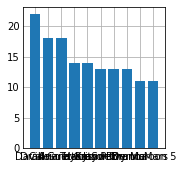

In [17]:
plt.style.use('_mpl-gallery')

# make data
x = Resp1b['artist']
y = Resp1b['Numero_canciones']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, linewidth=2.0)

plt.show()

In [18]:
# PUNTO 2: ¿Cómo se diferencian las canciones de los géneros de Latin y Folk/Acoustic en relación con su duración? 
#          Encuentre la diferencia del tiempo promedio de ambos géneros.

#Se crea un nuevo dataFrame filtrando estos dos generos y se crea una nueva columna en donde se indique si la canción pertenece a alguno de los dos generos

CancionesxGenero = CancionesxArtistas[['song','duration_ms','genre']]
CancionesxGenero['GeneroRequerido'] = CancionesxGenero['genre'].str.contains('Latin|Folk', case=False, regex=True)

In [19]:
# Se crea un dataFrame con datos acotados. En este nuevo dataFrame solo contienen canciones cuyo genero pertenezca a Latin o Folk

CancionesLatinFolk=CancionesxGenero[(CancionesxGenero['GeneroRequerido'] == True)]
CancionesLatinFolk

,song,duration_ms,genre,GeneroRequerido
21,Sexbomb,211893.0,"rock,, Folk/Acoustic,, easy listening",True
40,Be With You,219360.0,"pop,, latin",True
51,She Bangs - English Version,280626.0,"pop,, latin",True
59,Go Let It Out,278666.0,"Folk/Acoustic,, rock",True
69,Maria Maria (feat. The Product G&B),261973.0,"rock,, blues,, latin",True
...,...,...,...,...
1960,Callaita,250533.0,latin,True
1962,Calma - Remix,238200.0,"pop,, latin",True
1964,Soltera - Remix,266086.0,"pop,, latin",True
1979,Secreto,258800.0,latin,True


In [20]:
CancionesLatinFolk['genre'].unique()

array(['rock,, Folk/Acoustic,, easy listening', 'pop,, latin',
       'Folk/Acoustic,, rock', 'rock,, blues,, latin',
       'pop,, Folk/Acoustic', 'hip hop,, pop,, latin',
       'World/Traditional,, Folk/Acoustic', 'Folk/Acoustic,, pop',
       'hip hop,, pop,, R&B,, latin', 'rock,, R&B,, Folk/Acoustic,, pop',
       'latin', 'World/Traditional,, pop,, Folk/Acoustic',
       'Folk/Acoustic,, rock,, pop', 'pop,, rock,, Folk/Acoustic',
       'country,, latin', 'rock,, Folk/Acoustic,, pop',
       'hip hop,, latin,, Dance/Electronic'], dtype=object)

In [21]:
#Se crea una nueva columna indicando cuales pertenecen a Folk y cuales a Latin
CancionesLatinFolk['GenreLatin'] = CancionesLatinFolk['genre'].str.contains('Latin', case=False, regex=True)
CancionesLatinFolk['GenreFolk'] = CancionesLatinFolk['genre'].str.contains('Folk', case=False, regex=True)
CancionesLatinFolk

,song,duration_ms,genre,GeneroRequerido,GenreLatin,GenreFolk
21,Sexbomb,211893.0,"rock,, Folk/Acoustic,, easy listening",True,False,True
40,Be With You,219360.0,"pop,, latin",True,True,False
51,She Bangs - English Version,280626.0,"pop,, latin",True,True,False
59,Go Let It Out,278666.0,"Folk/Acoustic,, rock",True,False,True
69,Maria Maria (feat. The Product G&B),261973.0,"rock,, blues,, latin",True,True,False
...,...,...,...,...,...,...
1960,Callaita,250533.0,latin,True,True,False
1962,Calma - Remix,238200.0,"pop,, latin",True,True,False
1964,Soltera - Remix,266086.0,"pop,, latin",True,True,False
1979,Secreto,258800.0,latin,True,True,False


In [22]:
#Se genera un GroupBy que me sume la duracion de las cancaciones del genero Latin

DuracionLatin = CancionesLatinFolk.groupby(['GenreLatin']).sum('duration_ms')
DuracionLatin['Genre'] = "Latin"
flt = DuracionLatin['GenreFolk']==0
DuracionLatin = DuracionLatin[flt]
DuracionLatin = DuracionLatin[['Genre','duration_ms']] 
DuracionLatin

,Genre,duration_ms
GenreLatin,,
True,Latin,14571191.0


In [23]:
#Se genera un GroupBy que me sume la duracion de las cancaciones del genero Latin

NumCancionesLatin = CancionesLatinFolk.groupby(['GenreLatin']).size().reset_index(name='num_canciones')
NumCancionesLatin['Genre'] = "Latin"
flt = NumCancionesLatin['GenreLatin']==True
NumCancionesLatin = NumCancionesLatin[flt]

In [24]:
#Se hace un merge para que ambos resultados de Canciones Latin queden en un solo dataFrame

dfCancionesLatin = pd.merge(DuracionLatin, NumCancionesLatin, on='Genre', how='outer')
dfCancionesLatin= dfCancionesLatin[['Genre','duration_ms','num_canciones']]
dfCancionesLatin

,Genre,duration_ms,num_canciones
0,Latin,14571191.0,64


In [25]:
#Se genera un GroupBy que me sume la duracion de las cancaciones del genero Latin

DuracionFolk = CancionesLatinFolk.groupby(['GenreFolk']).sum('duration_ms')
DuracionFolk['Genre'] = "Folk"
flt = DuracionFolk['GenreLatin']==0
DuracionFolk = DuracionFolk[flt]
DuracionFolk = DuracionFolk[['Genre','duration_ms']] 
DuracionFolk

,Genre,duration_ms
GenreFolk,,
True,Folk,4403673.0


In [26]:
NumCancionesFolk = CancionesLatinFolk.groupby(['GenreFolk']).size().reset_index(name='num_canciones')
NumCancionesFolk['Genre'] = "Folk"
flt = NumCancionesFolk['GenreFolk']==True
NumCancionesFolk = NumCancionesFolk[flt]
NumCancionesFolk

,GenreFolk,num_canciones,Genre
1,True,20,Folk


In [27]:
#Se hace un merge para que ambos resultados de Canciones Folk queden en un solo dataFrame

dfCancionesFolk = pd.merge(DuracionFolk, NumCancionesFolk, on='Genre', how='outer')
dfCancionesFolk= dfCancionesFolk[['Genre','duration_ms','num_canciones']]
dfCancionesFolk

,Genre,duration_ms,num_canciones
0,Folk,4403673.0,20


In [28]:
# Se construye un dataFrame que nos integre los resultados Latin y Folk. Por último se incluye la columna de tiempo promedio. 
# Tiempo Promedio = (Total Tiempo / Numero de Canciones)

RespuestaPunto2 = dfCancionesFolk
RespuestaPunto2.loc[1]=dfCancionesLatin.loc[0]
RespuestaPunto2 ['Tiempo Promedio'] = RespuestaPunto2['duration_ms']/RespuestaPunto2['num_canciones'] 
RespuestaPunto2.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto2.csv",quotechar=',')

In [29]:
RespuestaPunto2

,Genre,duration_ms,num_canciones,Tiempo Promedio
0,Folk,4403673.0,20,220183.650000
1,Latin,14571191.0,64,227674.859375


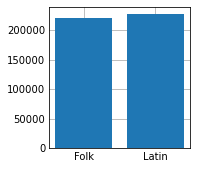

In [30]:
plt.style.use('_mpl-gallery')

# make data
x = RespuestaPunto2['Genre']
y = RespuestaPunto2['Tiempo Promedio']

# plot
fig, ax = plt.subplots()

ax.bar(x, y, linewidth=2.0)


# plot
plt.show()

In [31]:
# PUNTO 3: Halle el top 5 de los géneros del 2019 según la cantidad de canciones. ¿Cómo ha variado la cantidad de canciones del 
#          Top de géneros en los años 2000, 2005, 2010, 2015, 2019?

CancionesxGenero['genre'].unique()

array(['pop', 'rock,, pop', 'pop,, country', 'rock,, metal',
       'hip hop,, pop,, R&B', 'hip hop', 'pop,, rock', 'pop,, R&B',
       'Dance/Electronic', 'pop,, Dance/Electronic',
       'rock,, Folk/Acoustic,, easy listening', 'metal', 'hip hop,, pop',
       'R&B', 'pop,, latin', 'Folk/Acoustic,, rock',
       'pop,, easy listening,, Dance/Electronic', 'rock',
       'rock,, blues,, latin', 'pop,, rock,, metal', 'rock,, pop,, metal',
       'hip hop,, R&B', 'pop,, Folk/Acoustic', 'set()',
       'hip hop,, pop,, latin', 'hip hop,, Dance/Electronic',
       'hip hop,, pop,, rock', 'World/Traditional,, Folk/Acoustic',
       'Folk/Acoustic,, pop', 'rock,, easy listening',
       'World/Traditional,, hip hop', 'hip hop,, pop,, R&B,, latin',
       'rock,, blues', 'rock,, R&B,, Folk/Acoustic,, pop', 'latin',
       'pop,, R&B,, Dance/Electronic', 'World/Traditional,, rock',
       'pop,, rock,, Dance/Electronic', 'pop,, easy listening,, jazz',
       'rock,, Dance/Electronic',
       '

In [32]:
#Exportaremos a un dataFrame la lista de generos.

dataListaGeneros = {'Genre': CancionesxGenero['genre'].unique()}
dfListaGeneros = pd.DataFrame(dataListaGeneros)
dfMatrizGeneros = dfListaGeneros.transpose()

In [33]:
# La matriz la exportamos a un archivo transitorio 
dfMatrizGeneros.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Lista_Generos.csv",header=False, quotechar=',')

In [34]:
# Se carga nuevamente como un registro para poder quitarle las comillas

dfQuitarComillas= pd.read_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Lista_Generos.csv", header=None, delimiter=';')
dfQuitarComillas.iloc[:,0].apply(RemoverComillas)
dfQuitarComillas.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Lista_Generos1.csv",header=False, quotechar=',')

In [35]:
#def RemoverEspacios(x):
#    x2 = x.str() 
#    x = x2.replace(" ",',')             
#return x

In [36]:
# Se carga Nuevamente esta vez si como matriz y se le quitan las celdas en blanco. 

dfGenero = pd.read_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Lista_Generos1.csv", header=None, delimiter=',',na_filter=False)
dfGenero = dfGenero.transpose()
dfGenero= dfGenero[(dfGenero[0] != '')]
dfGenero[0].str.lstrip(' ')
dfGenero[0].str.rstrip(' ')
dfGenero[0].str.lstrip(' ')
# dfGenero.iloc[:,0].apply(RemoverEspacios)
dfGenero

,0
0,0
2,Genre
4,pop
8,rock
16,pop
...,...
918,hip hop
926,latin
934,Dance/Electronic
940,hip hop


In [37]:
# se dejan unicamente los valores únicos y se exportan

data= {0: dfGenero[0].unique()}
dfGeneroUnico = pd.DataFrame(data)
dfGeneroUnico

,0
0,0
1,Genre
2,pop
3,rock
4,pop
5,country
6,metal
7,hip hop
8,R&B
9,rock


In [38]:
dfGeneroUnico.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\Lista_Generos_Unicos.csv",header=False, quotechar=',')

In [39]:
# Creamos un dataFrame con los generos único que estan en el archivo que tenia los Generos.

dataGeneros = {'Genre': ['blues','classical','country','Dance/Electronic','easy listening','Folk/Acoustic','World/Traditional','hip hop','jazz','latin','metal','pop','R&B','Rock']}
dfGeneroPorAño = pd.DataFrame(dataGeneros)
dfGeneroPorAño

,Genre
0,blues
1,classical
2,country
3,Dance/Electronic
4,easy listening
5,Folk/Acoustic
6,World/Traditional
7,hip hop
8,jazz
9,latin


In [40]:
# Se crean columnas con un flag que permita identificar a que genero pertenece. Esto nos evita ciertos problemas de datos como espacios

CancionesxAnhoEjercicio = CancionesxArtistas[CancionesxArtistas.year.isin([2000,2005,2010,2015,2019])]
CancionesxAnhoyGen = CancionesxAnhoEjercicio[['artist','song','year','genre']] 
CancionesxAnhoyGen['Latin'] = CancionesxAnhoyGen['genre'].str.contains('Latin', case=False, regex=True)
CancionesxAnhoyGen['Blues'] = CancionesxAnhoyGen['genre'].str.contains('Blues', case=False, regex=True)
CancionesxAnhoyGen['Classical'] = CancionesxAnhoyGen['genre'].str.contains('Classical', case=False, regex=True)
CancionesxAnhoyGen['Country'] = CancionesxAnhoyGen['genre'].str.contains('Country', case=False, regex=True)
CancionesxAnhoyGen['Dance'] = CancionesxAnhoyGen['genre'].str.contains('Dance', case=False, regex=True)
CancionesxAnhoyGen['Easy'] = CancionesxAnhoyGen['genre'].str.contains('Easy', case=False, regex=True)
CancionesxAnhoyGen['Folk'] = CancionesxAnhoyGen['genre'].str.contains('Folk', case=False, regex=True)
CancionesxAnhoyGen['World'] = CancionesxAnhoyGen['genre'].str.contains('World', case=False, regex=True)
CancionesxAnhoyGen['HipHop'] = CancionesxAnhoyGen['genre'].str.contains('hip hop', case=False, regex=True)
CancionesxAnhoyGen['Jazz'] = CancionesxAnhoyGen['genre'].str.contains('jazz', case=False, regex=True)
CancionesxAnhoyGen['Metal'] = CancionesxAnhoyGen['genre'].str.contains('metal', case=False, regex=True)
CancionesxAnhoyGen['R&B'] = CancionesxAnhoyGen['genre'].str.contains('R&B', case=False, regex=True)
CancionesxAnhoyGen['Rock'] = CancionesxAnhoyGen['genre'].str.contains('Rock', case=False, regex=True)
CancionesxAnhoyGen['Pop'] = CancionesxAnhoyGen['genre'].str.contains('Pop', case=False, regex=True)
CancionesxAnhoyGen

,artist,song,year,genre,Latin,Blues,Classical,Country,Dance,Easy,Folk,World,HipHop,Jazz,Metal,R&B,Rock,Pop
0,Britney Spears,Oops!...I Did It Again,2000.0,pop,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,Bon Jovi,It's My Life,2000.0,"rock,, metal",False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,*NSYNC,Bye Bye Bye,2000.0,pop,False,False,False,False,False,False,False,False,False,False,False,False,False,True
6,Eminem,The Real Slim Shady,2000.0,hip hop,False,False,False,False,False,False,False,False,True,False,False,False,False,False
7,Robbie Williams,Rock DJ,2000.0,"pop,, rock",False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Jonas Brothers,Sucker,2019.0,pop,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1995,Taylor Swift,Cruel Summer,2019.0,pop,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,Blanco Brown,The Git Up,2019.0,"hip hop,, country",False,False,False,True,False,False,False,False,True,False,False,False,False,False
1997,Sam Smith,Dancing With A Stranger (with Normani),2019.0,pop,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [41]:
# a partir de esta linea empezamos a generar dataFrames por cada Genero y contando el numero de canciones por dicho genero

NumCancionesLatinxAño = CancionesxAnhoyGen.groupby(['Latin','year']).size().reset_index(name='num_canciones')
flt = NumCancionesLatinxAño['Latin']==True
NumCancionesLatinxAño = NumCancionesLatinxAño[flt] 
NumCancionesLatinxAño['Genre'] = "Latin"
NumCancionesLatinxAño = NumCancionesLatinxAño [['Genre','year','num_canciones']] 

In [42]:
NumCancionesBluesxAño = CancionesxAnhoyGen.groupby(['Blues','year']).size().reset_index(name='num_canciones')
flt = NumCancionesBluesxAño['Blues']==True
NumCancionesBluesxAño = NumCancionesBluesxAño[flt] 
NumCancionesBluesxAño['Genre'] = "Blues"
NumCancionesBluesxAño = NumCancionesBluesxAño [['Genre','year','num_canciones']] 

In [43]:
NumCancionesClassicalxAño = CancionesxAnhoyGen.groupby(['Classical','year']).size().reset_index(name='num_canciones')
flt = NumCancionesClassicalxAño['Classical']==True
NumCancionesClassicalxAño = NumCancionesClassicalxAño[flt] 
NumCancionesClassicalxAño['Genre'] = "Classical"
NumCancionesClassicalxAño = NumCancionesClassicalxAño [['Genre','year','num_canciones']]

In [44]:
NumCancionesCountryxAño = CancionesxAnhoyGen.groupby(['Country','year']).size().reset_index(name='num_canciones')
flt = NumCancionesCountryxAño['Country']==True
NumCancionesCountryxAño = NumCancionesCountryxAño[flt] 
NumCancionesCountryxAño['Genre'] = "Country"
NumCancionesCountryxAño = NumCancionesCountryxAño [['Genre','year','num_canciones']]

In [45]:
NumCancionesDancexAño = CancionesxAnhoyGen.groupby(['Dance','year']).size().reset_index(name='num_canciones')
flt = NumCancionesDancexAño['Dance']==True
NumCancionesDancexAño = NumCancionesDancexAño[flt] 
NumCancionesDancexAño['Genre'] = "Dance"
NumCancionesDancexAño = NumCancionesDancexAño [['Genre','year','num_canciones']]

In [46]:
NumCancionesEasyxAño = CancionesxAnhoyGen.groupby(['Easy','year']).size().reset_index(name='num_canciones')
flt = NumCancionesEasyxAño['Easy']==True
NumCancionesEasyxAño = NumCancionesEasyxAño[flt] 
NumCancionesEasyxAño['Genre'] = "Easy"
NumCancionesEasyxAño = NumCancionesEasyxAño [['Genre','year','num_canciones']]

In [47]:
NumCancionesFolkxAño = CancionesxAnhoyGen.groupby(['Folk','year']).size().reset_index(name='num_canciones')
flt = NumCancionesFolkxAño['Folk']==True
NumCancionesFolkxAño = NumCancionesFolkxAño[flt] 
NumCancionesFolkxAño['Genre'] = "Folk"
NumCancionesFolkxAño = NumCancionesFolkxAño [['Genre','year','num_canciones']]

In [48]:
NumCancionesWorldxAño = CancionesxAnhoyGen.groupby(['World','year']).size().reset_index(name='num_canciones')
flt = NumCancionesWorldxAño['World']==True
NumCancionesWorldxAño = NumCancionesWorldxAño[flt] 
NumCancionesWorldxAño['Genre'] = "World"
NumCancionesWorldxAño = NumCancionesWorldxAño [['Genre','year','num_canciones']]

In [49]:
NumCancionesHipHopxAño = CancionesxAnhoyGen.groupby(['HipHop','year']).size().reset_index(name='num_canciones')
flt = NumCancionesHipHopxAño['HipHop']==True
NumCancionesHipHopxAño = NumCancionesHipHopxAño[flt] 
NumCancionesHipHopxAño['Genre'] = "HipHop"
NumCancionesHipHopxAño = NumCancionesHipHopxAño [['Genre','year','num_canciones']]

In [50]:
NumCancionesJazzxAño = CancionesxAnhoyGen.groupby(['Jazz','year']).size().reset_index(name='num_canciones')
flt = NumCancionesJazzxAño['Jazz']==True
NumCancionesJazzxAño = NumCancionesJazzxAño[flt] 
NumCancionesJazzxAño['Genre'] = "Jazz"
NumCancionesJazzxAño = NumCancionesJazzxAño [['Genre','year','num_canciones']]

In [51]:
NumCancionesMetalxAño = CancionesxAnhoyGen.groupby(['Metal','year']).size().reset_index(name='num_canciones')
flt = NumCancionesMetalxAño['Metal']==True
NumCancionesMetalxAño = NumCancionesMetalxAño[flt] 
NumCancionesMetalxAño['Genre'] = "Metal"
NumCancionesMetalxAño = NumCancionesMetalxAño [['Genre','year','num_canciones']]

In [52]:
NumCancionesRockxAño = CancionesxAnhoyGen.groupby(['Rock','year']).size().reset_index(name='num_canciones')
flt = NumCancionesRockxAño['Rock']==True
NumCancionesRockxAño = NumCancionesRockxAño[flt] 
NumCancionesRockxAño['Genre'] = "Rock"
NumCancionesRockxAño = NumCancionesRockxAño [['Genre','year','num_canciones']]

In [53]:
NumCancionesPopxAño = CancionesxAnhoyGen.groupby(['Pop','year']).size().reset_index(name='num_canciones')
flt = NumCancionesPopxAño['Pop']==True
NumCancionesPopxAño = NumCancionesPopxAño[flt] 
NumCancionesPopxAño['Genre'] = "Pop"
NumCancionesPopxAño = NumCancionesPopxAño [['Genre','year','num_canciones']]

In [54]:
NumCancionesRyBxAño = CancionesxAnhoyGen.groupby(['R&B','year']).size().reset_index(name='num_canciones')
flt = NumCancionesRyBxAño['R&B']==True
NumCancionesRyBxAño = NumCancionesRyBxAño[flt] 
NumCancionesRyBxAño['Genre'] = "R&B"
NumCancionesRyBxAño = NumCancionesRyBxAño [['Genre','year','num_canciones']]

In [55]:
# Generamos un unico dataframe con todos los datos - incluyendo titulos.

UnionDataframes = [NumCancionesEasyxAño,NumCancionesFolkxAño,NumCancionesHipHopxAño,NumCancionesLatinxAño,NumCancionesBluesxAño,NumCancionesClassicalxAño,NumCancionesCountryxAño,NumCancionesDancexAño,NumCancionesRyBxAño,NumCancionesPopxAño,NumCancionesRockxAño,NumCancionesMetalxAño,NumCancionesJazzxAño,NumCancionesWorldxAño]

In [56]:
# limpiamos y ponemos un nuevo indice

MatrizRespuestaPunto3 = pd.concat(UnionDataframes, ignore_index=True)

In [57]:
# Para responder la primera pregunta "Halle el top 5 de los géneros del 2019 según la cantidad de canciones" se hace un filtro por el año
# y se genera el top 5 

flt = MatrizRespuestaPunto3['year']==2019
Rta3a = MatrizRespuestaPunto3[flt].sort_values('num_canciones',ascending = False).head(5)
Rta3a.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto3a.csv",quotechar=',')
Rta3b = MatrizRespuestaPunto3
Rta3b.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto3b.csv",quotechar=',')

In [58]:
Rta3a

,Genre,year,num_canciones
31,Pop,2019.0,63
8,HipHop,2019.0,37
21,Dance,2019.0,21
26,R&B,2019.0,9
12,Latin,2019.0,8


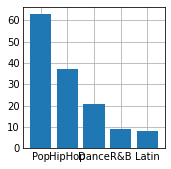

In [59]:
plt.style.use('_mpl-gallery')

# make data
x = Rta3a['Genre']
y = Rta3a['num_canciones']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, linewidth=2.0)
plt.show()

In [60]:
Rta3b.sort_values('year',ascending = False)

,Genre,year,num_canciones
12,Latin,2019.0,8
26,R&B,2019.0,9
40,Metal,2019.0,2
31,Pop,2019.0,63
21,Dance,2019.0,21
8,HipHop,2019.0,37
16,Country,2019.0,1
36,Rock,2019.0,2
35,Rock,2015.0,14
25,R&B,2015.0,21


In [61]:
# Como podemos observar, existen generos que en los ultimos años, o no tenemos datos para los datos seleccionados, o no existen canciones 
# sobre dichos generos. un ejemplo de esto es Metal, Folk/Acoustic, Easy listening',blues,'World/Traditional. En terminos generales podemos
# observar que el mayor numero de canciones se presentan en el genero POP como Hip/Hop. No se muestra un crecimiento para las fechas, solo se 
# observa que es el mayor numero y su comparación puede ser con ella misma y no otros generos.

In [62]:
# PUNTO 4: Por tiempo no lo hice, pase directo al punto 4
# PUNTO 5: Grafique la progresión de la popularidad promedio por género y por año. Concluya sobre la gráfica, ej: ¿existen tendencias?

# Primero se construye el dataFrame limitando los campos con los que vamos a trabajar a los extractamente necesarios. De arrancada vamos a suponer
# que toda popularidad NAN es porque no se cuenta con el dato y no entra en el análisis.

MatrizPunto5 = CancionesxArtistas[['genre','popularity','year']]

In [63]:
MatrizPunto5

,genre,popularity,year
0,pop,77.0,2000.0
1,"rock,, pop",79.0,1999.0
2,"pop,, country",66.0,1999.0
3,"rock,, metal",78.0,2000.0
4,pop,NaN,2000.0
...,...,...,...
1994,pop,79.0,2019.0
1995,pop,78.0,2019.0
1996,"hip hop,, country",69.0,2019.0
1997,pop,75.0,2019.0


In [64]:
#Generamos los campos por genero que vamos a filtrar, utilizando la misma logica del punto 3.

MatrizPunto5['Latin'] = MatrizPunto5['genre'].str.contains('Latin', case=False, regex=True)
MatrizPunto5['Blues'] = MatrizPunto5['genre'].str.contains('Blues', case=False, regex=True)
MatrizPunto5['Classical'] = MatrizPunto5['genre'].str.contains('Classical', case=False, regex=True)
MatrizPunto5['Country'] = MatrizPunto5['genre'].str.contains('Country', case=False, regex=True)
MatrizPunto5['Dance'] = MatrizPunto5['genre'].str.contains('Dance', case=False, regex=True)
MatrizPunto5['Easy'] = MatrizPunto5['genre'].str.contains('Easy', case=False, regex=True)
MatrizPunto5['Folk'] = MatrizPunto5['genre'].str.contains('Folk', case=False, regex=True)
MatrizPunto5['World'] = MatrizPunto5['genre'].str.contains('World', case=False, regex=True)
MatrizPunto5['HipHop'] = MatrizPunto5['genre'].str.contains('hip hop', case=False, regex=True)
MatrizPunto5['Jazz'] = MatrizPunto5['genre'].str.contains('jazz', case=False, regex=True)
MatrizPunto5['Metal'] = MatrizPunto5['genre'].str.contains('metal', case=False, regex=True)
MatrizPunto5['R&B'] = MatrizPunto5['genre'].str.contains('R&B', case=False, regex=True)
MatrizPunto5['Rock'] = MatrizPunto5['genre'].str.contains('Rock', case=False, regex=True)
MatrizPunto5['Pop'] = MatrizPunto5['genre'].str.contains('Pop', case=False, regex=True)
MatrizPunto5

,genre,popularity,year,Latin,Blues,Classical,Country,Dance,Easy,Folk,World,HipHop,Jazz,Metal,R&B,Rock,Pop
0,pop,77.0,2000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,"rock,, pop",79.0,1999.0,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,"pop,, country",66.0,1999.0,False,False,False,True,False,False,False,False,False,False,False,False,False,True
3,"rock,, metal",78.0,2000.0,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,pop,NaN,2000.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,pop,79.0,2019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1995,pop,78.0,2019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,"hip hop,, country",69.0,2019.0,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1997,pop,75.0,2019.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [65]:
# Generamos los filtros que vamos a utilizar para hacer las matriz de popularidad por genero y año.

fltLatin = MatrizPunto5['Latin']==True
fltBlues = MatrizPunto5['Blues']==True
fltDance = MatrizPunto5['Dance']==True
fltClassical = MatrizPunto5['Classical']==True
fltCountry = MatrizPunto5['Country']==True
fltEasy = MatrizPunto5['Easy']==True
fltFolk = MatrizPunto5['Folk']==True
fltWorld = MatrizPunto5['World']==True
fltHipHop = MatrizPunto5['HipHop']==True
fltJazz = MatrizPunto5['Jazz']==True
fltMetal = MatrizPunto5['Metal']==True
fltRyB = MatrizPunto5['R&B']==True
fltRock = MatrizPunto5['Rock']==True
fltPop = MatrizPunto5['Pop']==True

In [66]:
popularityLatinxAño = MatrizPunto5[fltLatin]
popularityLatinxAño=popularityLatinxAño[['year','popularity']]
popularityLatinxAño['Genre']="Latin"

popularityDancexAño = MatrizPunto5[fltDance]
popularityDancexAño=popularityDancexAño[['year','popularity']]
popularityDancexAño['Genre']="Dance"
popularityDancexAño

popularityBluesxAño = MatrizPunto5[fltBlues]
popularityBluesxAño=popularityBluesxAño[['year','popularity']]
popularityBluesxAño['Genre']="Blues"
popularityBluesxAño

popularityClassicalxAño = MatrizPunto5[fltClassical]
popularityClassicalxAño=popularityClassicalxAño[['year','popularity']]
popularityClassicalxAño['Genre']="Classical"

popularityCountryxAño = MatrizPunto5[fltCountry]
popularityCountryxAño=popularityCountryxAño[['year','popularity']]
popularityCountryxAño['Genre']="Country"

popularityEasyxAño = MatrizPunto5[fltEasy]
popularityEasyxAño=popularityEasyxAño[['year','popularity']]
popularityEasyxAño['Genre']="Easy"

popularityFolkxAño = MatrizPunto5[fltFolk]
popularityFolkxAño=popularityFolkxAño[['year','popularity']]
popularityFolkxAño['Genre']="Folk"

popularityWorldxAño = MatrizPunto5[fltWorld]
popularityWorldxAño=popularityWorldxAño[['year','popularity']]
popularityWorldxAño['Genre']="World"

popularityHipHopxAño = MatrizPunto5[fltHipHop]
popularityHipHopxAño=popularityHipHopxAño[['year','popularity']]
popularityHipHopxAño['Genre']="HipHop"

popularityJazzxAño = MatrizPunto5[fltJazz]
popularityJazzxAño=popularityJazzxAño[['year','popularity']]
popularityJazzxAño['Genre']="Jazz"

popularityMetalxAño = MatrizPunto5[fltMetal]
popularityMetalxAño=popularityMetalxAño[['year','popularity']]
popularityMetalxAño['Genre']="Metal"

popularityRockxAño = MatrizPunto5[fltRock]
popularityRockxAño=popularityRockxAño[['year','popularity']]
popularityRockxAño['Genre']="Rock"

popularityPopxAño = MatrizPunto5[fltPop]
popularityPopxAño=popularityPopxAño[['year','popularity']]
popularityPopxAño['Genre']="Pop"

popularityRyBxAño = MatrizPunto5[fltRyB]
popularityRyBxAño=popularityRyBxAño[['year','popularity']]
popularityRyBxAño['Genre']="R&B"

In [67]:
popularityxAño = [popularityEasyxAño,popularityFolkxAño,popularityHipHopxAño,popularityLatinxAño,popularityBluesxAño,popularityClassicalxAño,popularityCountryxAño,popularityDancexAño,popularityRyBxAño,popularityPopxAño,popularityRockxAño,popularityMetalxAño,popularityJazzxAño,popularityWorldxAño]
popularityxAño = pd.concat(popularityxAño, ignore_index=True)
popularityxAño

,year,popularity,Genre
0,1999.0,65.0,Easy
1,2010.0,58.0,Easy
2,2002.0,60.0,Easy
3,2003.0,55.0,Easy
4,2005.0,60.0,Easy
...,...,...,...
3674,2005.0,64.0,World
3675,2006.0,35.0,World
3676,2006.0,61.0,World
3677,2010.0,0.0,World


In [68]:
SongsByGenre = popularityxAño.groupby(['year','Genre','popularity']).size().reset_index(name='num_canciones')
SongsByGenre = SongsByGenre[['Genre','year','popularity','num_canciones']]
GenrePopularityByYear = SongsByGenre.groupby(['Genre','year']).sum()
GenrePopularityByYear

popularity  num_canciones
Genre     year                             
Blues     1999.0        66.0              1
          2003.0         3.0              1
          2007.0       113.0              2
Classical 2015.0        63.0              1
Country   1999.0        66.0              1
...                      ...            ...
World     2004.0       120.0              2
          2005.0       135.0              2
          2006.0        96.0              2
          2010.0         0.0              1
          2020.0        57.0              1

[186 rows x 2 columns]

In [69]:
GenrePopularityByYear['Aver. Pop']=GenrePopularityByYear['popularity']/GenrePopularityByYear['num_canciones']
Rta5= GenrePopularityByYear.reset_index()

In [70]:
Rta5.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto5.csv",quotechar=',')

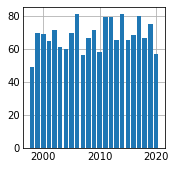

In [71]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = Rta5['year']
y = Rta5['Aver. Pop']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, linewidth=2.0)
plt.show()

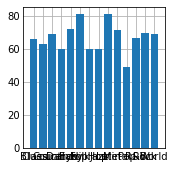

In [72]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = Rta5['Genre']
y = Rta5['Aver. Pop']

# plot
fig, ax = plt.subplots()
ax.bar(x, y, linewidth=2.0)
plt.show()

In [73]:
# Si revisamos tendencias macro como popularidad de la musica a traves del tiempo, no se observan tendencias. Uno practicamente podria
# inferir que sin importar el tiempo, siempre abra algun genero de la musica que destaque sobre otros. 

In [74]:
# PUNTO 6: Compare los géneros Pop y Rock según sus características de: energy, valence y tempo.
#          Concluya sobre su análisis

# Vamos a partir nuevamente preparando nuestro dataFrame.

MatrizPunto6 = CancionesxArtistas[['genre','energy','valence', 'tempo']]
MatrizPunto6['Rock'] = MatrizPunto6['genre'].str.contains('Rock', case=False, regex=True)
MatrizPunto6['Pop'] = MatrizPunto6['genre'].str.contains('Pop', case=False, regex=True)
MatrizPunto6

,genre,energy,valence,tempo,Rock,Pop
0,pop,0.834,0.894,95.053,False,True
1,"rock,, pop",0.897,0.684,148.726,True,True
2,"pop,, country",0.496,0.278,136.859,False,True
3,"rock,, metal",0.913,0.544,119.992,True,False
4,pop,0.928,0.879,172.656,False,True
...,...,...,...,...,...,...
1994,pop,0.734,0.952,137.958,False,True
1995,pop,0.702,0.564,169.994,False,True
1996,"hip hop,, country",0.678,0.811,NaN,False,False
1997,pop,0.520,0.347,102.998,False,True


In [75]:
fltRock = MatrizPunto6['Rock']==True
Matriz6Rock = MatrizPunto6[fltRock]
Matriz6Rock['Genero']="Rock"
Matriz6Rock=Matriz6Rock[['Genero','energy','valence','tempo']] 

fltPop = MatrizPunto6['Pop']==True
Matriz6Pop = MatrizPunto6[fltPop]
Matriz6Pop['Genero']="Pop"
Matriz6Pop=Matriz6Pop[['Genero','energy','valence','tempo']] 

Matriz6PopRock = [Matriz6Pop,Matriz6Rock]
Matriz6PopRock = pd.concat(Matriz6PopRock,ignore_index=True)

In [76]:
Matriz6PopRock

,Genero,energy,valence,tempo
0,Pop,0.834,0.894,95.053
1,Pop,0.897,0.684,148.726
2,Pop,0.496,0.278,136.859
3,Pop,0.928,0.879,172.656
4,Pop,0.888,0.714,121.549
...,...,...,...,...
1860,Rock,0.408,0.374,127.921
1861,Rock,0.641,0.453,100.028
1862,Rock,0.557,0.483,150.073
1863,Rock,0.518,0.877,151.891


In [77]:
SumNumCanciones=Matriz6PopRock.groupby(['Genero','energy','valence','tempo']).size().reset_index(name='num_canciones')
GenreByEVTN = SumNumCanciones[['Genero','energy','valence','tempo','num_canciones']]
Agrupacion = GenreByEVTN.groupby(['Genero']).sum()

In [78]:
Agrupacion['Avr. Energy']=Agrupacion['energy']/Agrupacion['num_canciones']
Agrupacion['Avr. Valence']=Agrupacion['valence']/Agrupacion['num_canciones']
Agrupacion['Avr. Tempo']=Agrupacion['tempo']/Agrupacion['num_canciones']

In [79]:
Agrupacion.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto6.csv",quotechar=',')

In [80]:
Agrupacion=Agrupacion.reset_index()

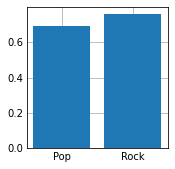

In [81]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = Agrupacion['Genero']
y = Agrupacion['Avr. Energy']


fig, ax = plt.subplots()
ax.bar(x, y, linewidth=2.0)


# plot

#fig, ax = plt.subplots()
#ax.bar(x, y, width=1, edgecolor="white", linewidth=0.2)
plt.show()

In [ ]:
#Punto 7: Plantee una pregunta de negocio de su interés, ya sea por tipo de música, artistas u otra
#         dimensión, mediante la cual se analicen al menos 3 variables del dataset y concluya.

#Vamos a tomar un dataSet existente

In [84]:
GenrePopularityByYear.to_csv(r"C:\Users\LGARCIA\OneDrive - Valorem\LGARCIA\Documents\04. Estudio\05. Maestria\Ciencia Aplicada de Datos\Taller No. 1\Datos\RtaPunto7.csv",quotechar=',')

In [ ]:
# Pregunta de Negocio: La popularidad de un generó dependerá directamente de la cantidad de canciones que se produzca en anualmente? La respuesta es no
# Al revisar algunos generos como "pop" o "rock" podemos evidenciar que existieron periodos con baja popularidad como entre 2011 y 2016 el cual
# tuvieron un numero considerable de canciones.Eso influirá en las ventas? 